In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from lightkurve import KeplerTargetPixelFile

In [3]:
tabby = KeplerTargetPixelFile.from_archive(8462852, quarter=8)

INFO: Found cached file ./mastDownload/Kepler/kplr008462852_lc_Q111111111111111111/kplr008462852-2011073133259_lpd-targ.fits.gz with expected size 6000827. [astroquery.query]


In [7]:
from lightkurve import SceneModel, PRFPhotometry

In [5]:
prf = tabby.get_prf_model()

In [6]:
scene = SceneModel(prfs=[prf])

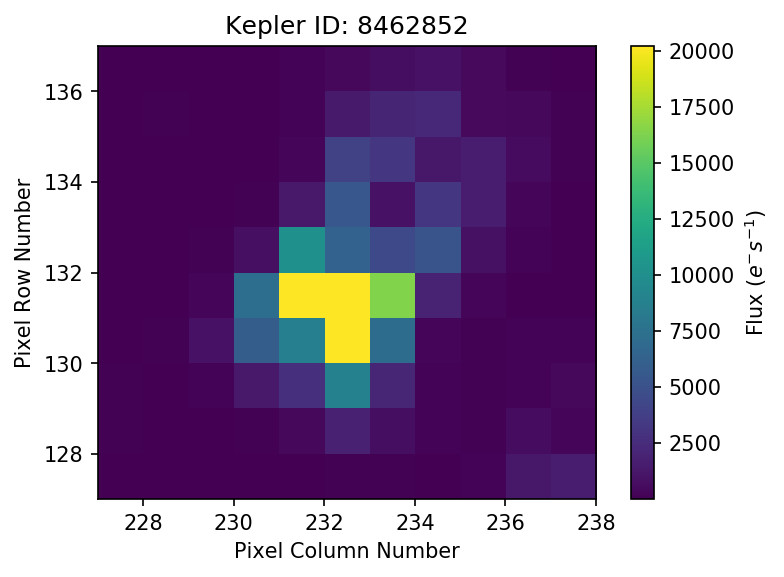

In [8]:
tabby.plot()

In [10]:
lc = tabby.to_lightcurve()

(247500, 248000)

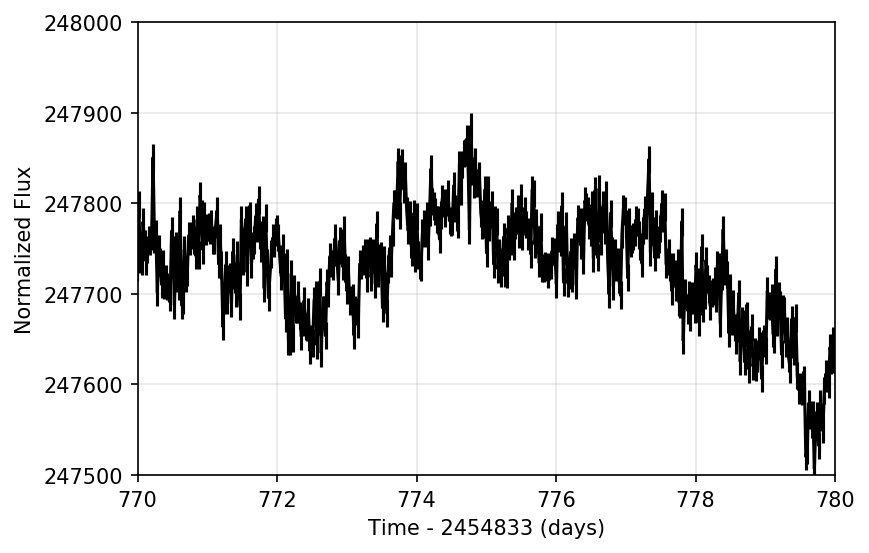

In [32]:
ax = lc.plot(normalize=False)
plt.xlim(770, 780)
plt.ylim(247500, 248000)

In [19]:
bkg_lc = tabby.get_bkg_lightcurve(aperture_mask=tabby.pipeline_mask)

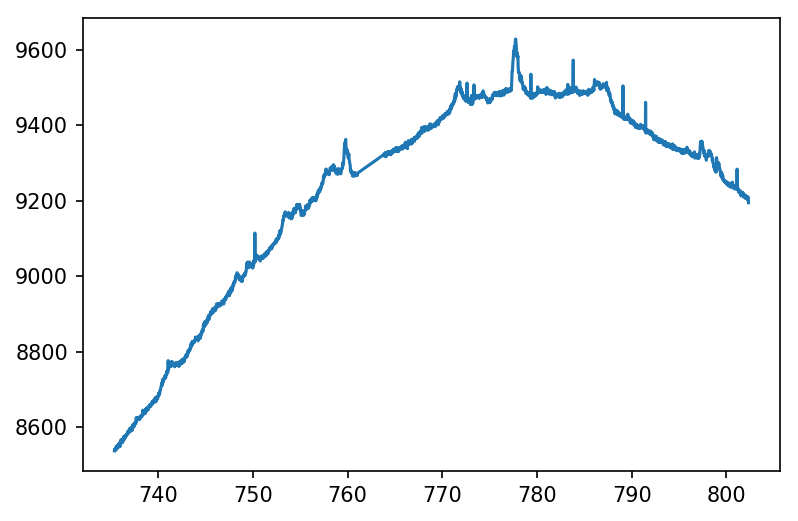

In [23]:
plt.plot(bkg_lc.time, bkg_lc.flux)

In [9]:
from oktopus.prior import UniformPrior

In [40]:
prior = UniformPrior(lb=[100e3, 228, 128, 0],
                     ub=[300e3, 237, 136, 10e3])

In [41]:
phot = PRFPhotometry(scene_model=scene, prior=prior)

In [42]:
results = phot.fit(tabby.flux + tabby.flux_bkg)

  0%|          | 0/3113 [00:00<?, ?it/s]/Users/jvmirca/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
100%|██████████| 3113/3113 [01:29<00:00, 34.63it/s]


In [43]:
flux = results[:, 0]

(770, 780)

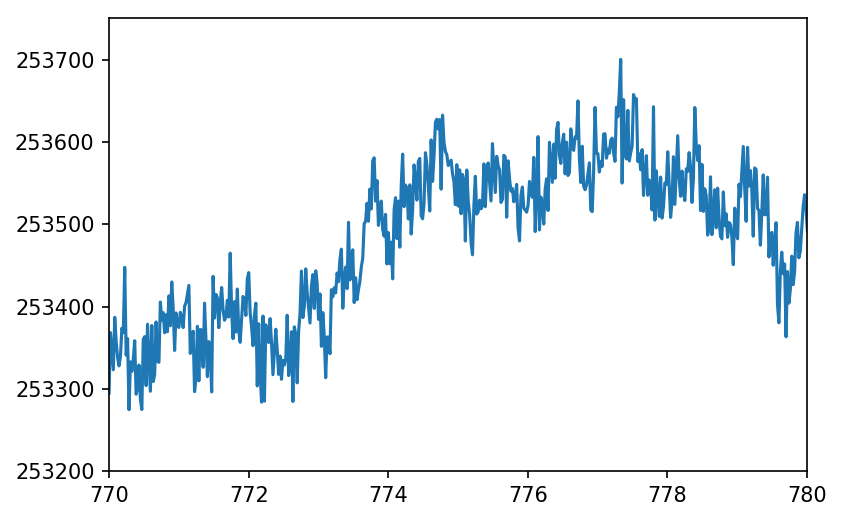

In [54]:
plt.plot(tabby.time, results[:, 0])
plt.ylim(253200, 253750)
plt.xlim(770, 780)